# 複素Newton法

## $x^3 - 1 = 0$ に対する複素Newton法

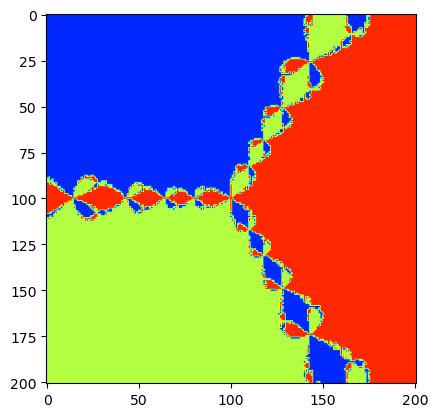

In [1]:
#
# f(x) = x^3 - 1 に対する複素Newton法
#
using PyPlot
function newton_fractal(center = Complex(0.0), width = 2.0, α=1.0; N=Int(100))
    iter = 0
    maxiter =100
    tol = 1e-4
    J = zeros(2N + 1, 2N + 1);
    ω = Complex(-1/2, sqrt(3)/2)
    root = [1, ω, conj(ω)]  # conj()は複素共役
    root_color = [2.6, 0.5, 1.7] # Newton法の収束先によって描画色を変える
    
    for i in -N:N, j in -N:N
        z = center + (i+j*im)/N*width; 
        iter = 0
        color = 0
        
        # Newton法の反復
        for l in 1:maxiter
            z = z - α*(z^3-1)/(3z^2) 
            # 停止条件
            # 厳密解がわかっているので，どれかに十分近づいたら止める．
            if minimum([abs(z - a) for a in root]) < tol
                iter = l; break
            end
        end
        
        if (iter == maxiter) 
            color = 3  # 最大反復回数に達した場合
        else
            # 停止時にzが一番近い解の色に設定
            min_dist, ind = findmin([abs(z - r) for r in root])
            color = root_color[ind] 
        end
        J[N + 1 - j,N + 1 + i] = color
    end
    return J
end

J = newton_fractal(Complex(0), 4.00)

# 画像表示
img = imshow(J, cmap="jet")
clim(0,3)  
#colorbar(img)     # カラーバーの表示

In [2]:
# M=10
# J = zeros(M,41,41)
# figure(figsize=(20, 50))
# for i in 1:M
#     α = 1.2 + 0.1i
#     J[i,:,:] = newton_fractal(Complex(0), 4.00, α, N=20)
#     subplot(M,5,i)
#     imshow(J[i,:,:], cmap="jet")    
#     clim(0,3)
#     axis("off")
# end

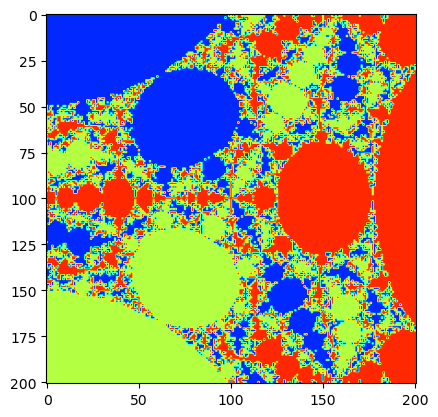

In [3]:
J = newton_fractal(Complex(0), 4.00, 2.1, N=100)
img = imshow(J, cmap="jet")
clim(0,3)  

## $x^4 + x^3 - 1 = 0$ に対する複素Newton法

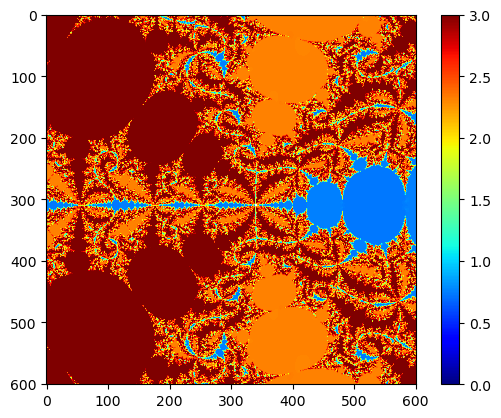

PyObject <matplotlib.colorbar.Colorbar object at 0x168daeaa0>

In [4]:
#
# f(x) = x^4 + x^3 - 1 に対する複素Newton法
#
using PyPlot
function newton_fractal2(center = Complex(0.0), width = 2.0)
    N = 300
    iter = 0
    maxiter =200
    tol = 1e-4
    J = zeros(2N + 1, 2N + 1);
    ω = Complex(-1/2, sqrt(3)/2)
    root = [1, ω, conj(ω)]  # conj()は複素共役
    root_color = [2.6, 0.5, 1.7] # Newton法の収束先によって描画色を変える
    
    for i in -N:N, j in -N:N
        z = center + (i+j*im)/N*width; 
        iter = 0
        color = 0
        
        # Newton法の反復
        for l in 1:maxiter
            z2 = z - 2.00*(z^5+z^3-1)/(5z^4+3z^2) #(z^3-1)/(3z^2) 
            # 停止条件
            # 厳密解がわかっているので，どれかに十分近づいたら止める．
            if abs(z2-z) < tol
                iter = l
                break
            end
            z = z2
        end
        
        if (iter == maxiter) 
            color = 10  # 最大反復回数に達した場合
        else
            color = abs(angle(z)) + sin(abs(z))
        end
        J[N + 1 - j,N + 1 + i] = color
    end
    return J
end

J = newton_fractal2(Complex(-0.4+0.1im), 3.00)

# 画像表示
img = imshow(J, cmap="jet")
clim(0,3)  
colorbar(img)     # カラーバーの表示

## `imshow` の表示テスト

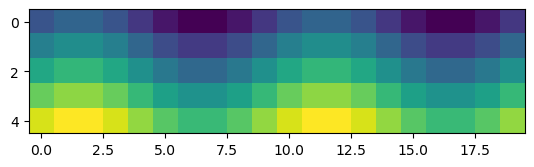

PyObject <matplotlib.image.AxesImage object at 0x168e61300>

In [5]:
M = [i + sin(pi/5*j) for i in 1:5, j in 1:20]
imshow(M)